In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('elantra.csv')
data = data.sort_values(by = ['Year', 'Month'], ascending = [True, True])
data = data.reset_index(drop = True)
data

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,2,2010,7966,9.8,130,209.924,217.251
2,3,2010,8225,9.9,138,209.163,217.305
3,4,2010,9657,9.9,132,209.024,217.376
4,5,2010,9781,9.6,177,206.172,217.299
5,6,2010,14245,9.4,138,204.161,217.285
6,7,2010,18215,9.5,156,206.834,217.677
7,8,2010,15181,9.5,202,208.927,218.012
8,9,2010,10062,9.5,150,209.850,218.281
9,10,2010,9497,9.5,178,216.655,219.024


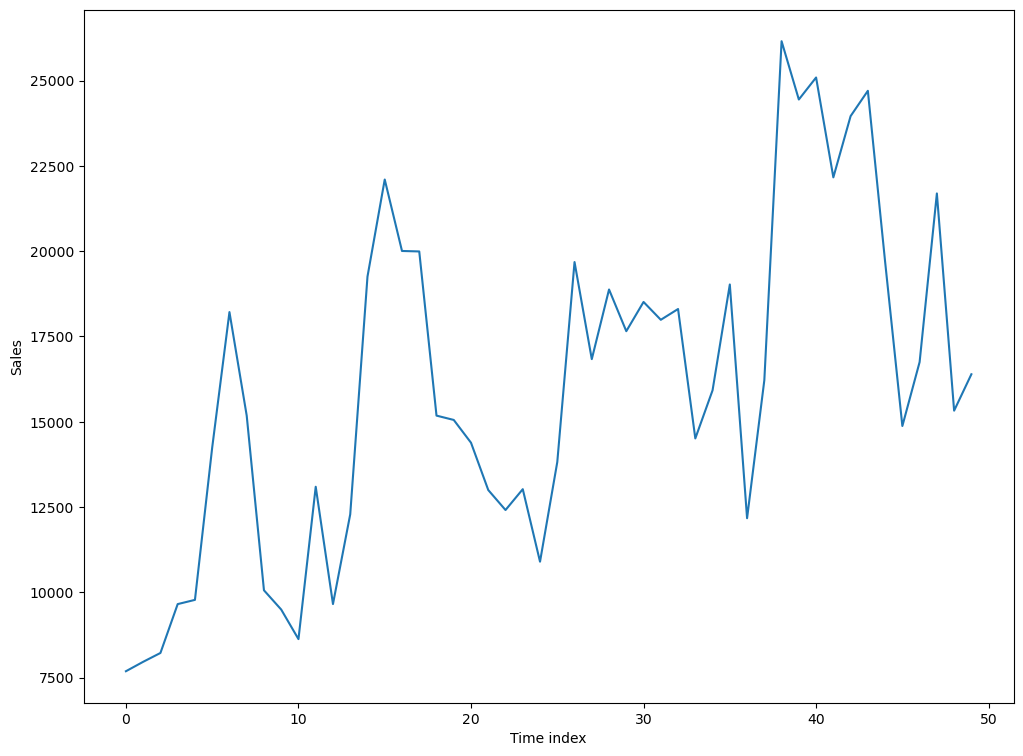

In [3]:
plt.figure(figsize = (12, 9))
plt.plot(data['ElantraSales'].values)
plt.xlabel('Time index')
plt.ylabel('Sales')
plt.show()

In [4]:
numeric_feats = data.columns.drop(["ElantraSales", "Month", "Year"])
numeric_feats

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

In [5]:
data_train = data[data.Year < 2013]
data_test = data[data.Year >= 2013]

In [6]:
scaler = StandardScaler()
scaler.fit(data_train[numeric_feats])
X_train = scaler.transform(data_train[numeric_feats])
X_test = scaler.transform(data_test[numeric_feats])
y_train = data_train['ElantraSales'].values
y_test = data_test['ElantraSales'].values

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
from sklearn.metrics import mean_squared_error
def rmse(yt, yd):
    return np.sqrt(mean_squared_error(yt, yd))

In [10]:
def relative_error(yt, yp):
    errors = np.abs(yp- yt).astype(float) / yt
    return np.mean(errors) * 100

In [11]:
y_pred = lr.predict(X_test)
print('RMSE: {:.2f}'.format(rmse(y_test, y_pred)))
print('Mean relative error: {:.1f}%'.format(relative_error(y_test, y_pred)))

RMSE: 5017.35
Mean relative error: 19.0%


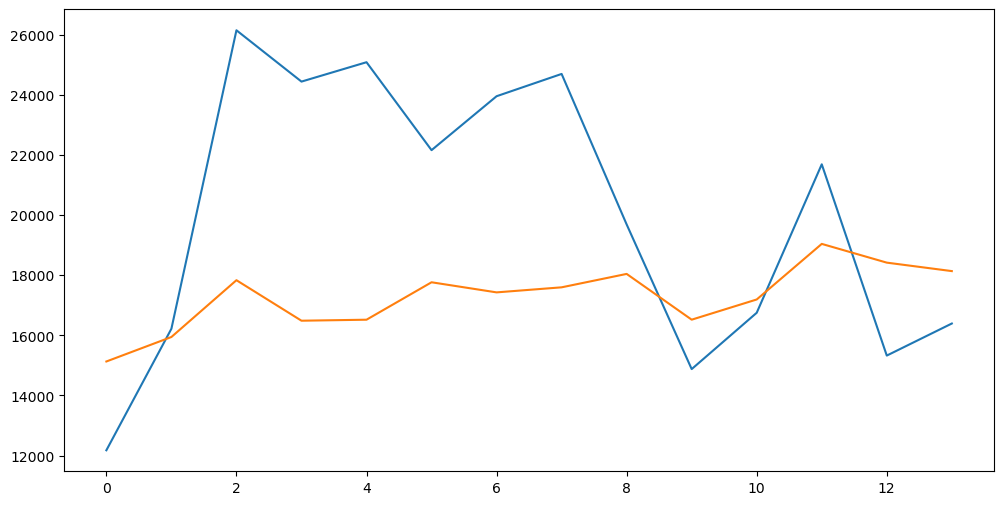

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [30]:
month_onehot_train = pd.get_dummies(data_train.Month)
month_onehot_train.head()


,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False


In [31]:
X_train = np.hstack((X_train, month_onehot_train))

In [32]:
month_onehot_test = pd.get_dummies(data_test.Month)
X_test = np.hstack((X_test, month_onehot_test))

In [33]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred_test = lr.predict(X_test)

In [35]:
print('RMSE: {:.2f}'.format(rmse(y_test, y_pred_test)))
print('Mean relative error: {:.1f}%'.format(relative_error(y_test, y_pred_test)))

RMSE: 3590.37
Mean relative error: 12.8%


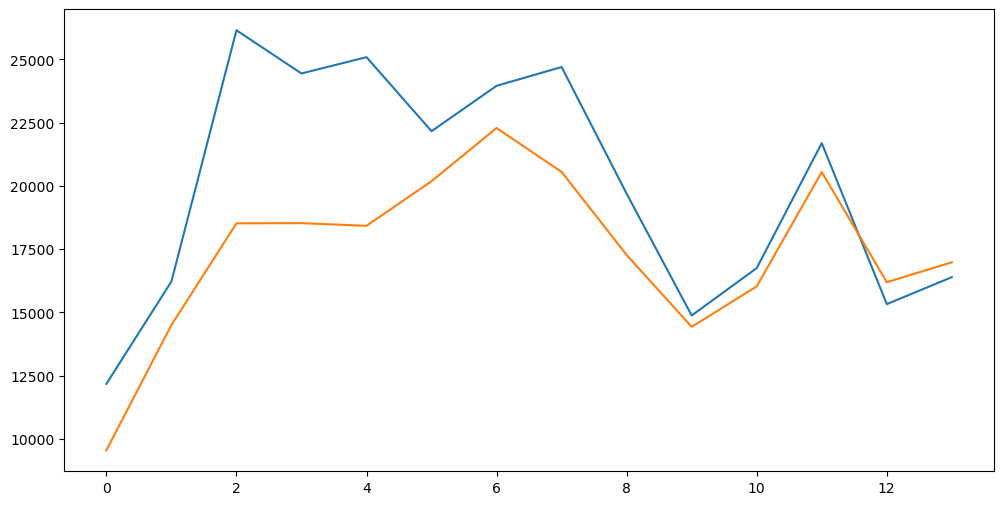

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(y_test)
plt.plot(y_pred_test)
plt.show()